In [ ]:
!pip install yfinance tslearn

In [ ]:
# ライブラリのインポート
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
# csvファイルの読み込み
file_path = '/content/drive/MyDrive/Private/SAMURAI/Python/graduation_work/electronic_equipment_industory_2410010736.csv'
data = pd.read_csv(file_path, encoding = 'Shift-JIS')
data

,コード?image,銘柄名,市場区分?image,業種分類?image,決算期?image,Unnamed: 5,注意情報等,基本情報,株価表示
0,31050,日清紡ホールディングス,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
1,40620,イビデン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
2,49020,コニカミノルタ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
3,64480,ブラザー工業,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
4,64790,ミネベアミツミ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
...,...,...,...,...,...,...,...,...,...
124,77510,キヤノン,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
125,77520,リコー,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
126,79650,象印マホービン,プライム,電気機器,11月,NaN,NaN,NaN,株価表示
127,80350,東京エレクトロン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示


In [ ]:
# 証券コードと銘柄名のカラムの名称を変更
rename_dict = {'コード?image': 'code', '銘柄名' : 'name'}
stock_df = data.rename(columns=rename_dict)
stock_df

,code,name,市場区分?image,業種分類?image,決算期?image,Unnamed: 5,注意情報等,基本情報,株価表示
0,31050,日清紡ホールディングス,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
1,40620,イビデン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
2,49020,コニカミノルタ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
3,64480,ブラザー工業,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
4,64790,ミネベアミツミ,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
...,...,...,...,...,...,...,...,...,...
124,77510,キヤノン,プライム,電気機器,12月,NaN,NaN,NaN,株価表示
125,77520,リコー,プライム,電気機器,3月,NaN,NaN,NaN,株価表示
126,79650,象印マホービン,プライム,電気機器,11月,NaN,NaN,NaN,株価表示
127,80350,東京エレクトロン,プライム,電気機器,3月,NaN,NaN,NaN,株価表示


In [ ]:
    history = yf.download(tickers='3105.T', start='2014-10-01', end='2024-09-30')
    stock_price_df = pd.DataFrame()
    stock_price_df['stock_'] = history['Adj Close']
    stock_price_df = stock_price_df.pct_change(fill_method=None)
    stock_price_df

[*********************100%***********************]  1 of 1 completed


,stock_
Date,
2014-10-01,NaN
2014-10-02,-0.028353
2014-10-03,0.002244
2014-10-06,0.010078
2014-10-07,-0.022173
...,...
2024-09-20,0.005911
2024-09-24,0.005449
2024-09-25,0.004888


In [ ]:
# 株価の取得関数を定義・実行
# 取得期間は2004/10/1～2024/9/30の20年間とする
def get_stock_price(df):
    stock_price_df = pd.DataFrame()

    for index,row in df.iterrows():
        stock_code = str(row['code'])[:-1] + '.T'
        stock_name = row['name']

        history = yf.download(tickers=stock_code, start='2004-10-01', end='2024-09-30')
        stock_price_df[stock_name] = history['Adj Close']

    stock_price_df = stock_price_df.pct_change(fill_method=None)
    return stock_price_df

stock_price_df = get_stock_price(stock_df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
# データフレームの行列数と欠損数を確認
display(stock_price_df.shape)
na_df = pd.DataFrame(stock_price_df.isnull().sum().rename('na'))
na_df

(4946, 129)

,na
日清紡ホールディングス,1
イビデン,1
コニカミノルタ,1
ブラザー工業,1
ミネベアミツミ,1
...,...
キヤノン,1
リコー,1
象印マホービン,1
東京エレクトロン,1


array([[<Axes: title={'center': 'na'}>]], dtype=object)

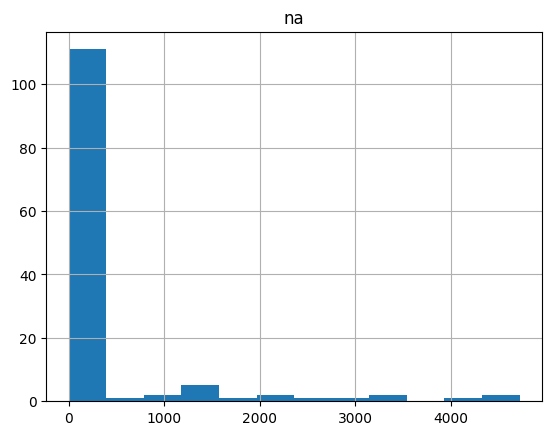

In [ ]:
# ヒストグラムでカラムごとの欠損数分布を確認
na_df.hist(bins=12)

In [ ]:
# 欠損数が500以下のカラムの個数を確認
na_df.query('na <= 500').count()

,0
na,111


In [ ]:
# 欠損数が500を超えるカラムを確認
na_df.query('na > 500').sort_values('na')

,na
ミマキエンジニアリング,635
マクセル,831
イノテック,886
レーザーテック,1353
Ｉ−ＰＥＸ,1353
エレコム,1353
鈴木,1353
ヤーマン,1355
ダブル・スコープ,1798
東光高岳,1994


In [ ]:
# 削除用にカラム名をリスト化する
remove_col = list(na_df.query('na > 500').index)
print(remove_col)

['ＰＨＣホールディングス', 'ＫＯＫＵＳＡＩ\u3000ＥＬＥＣＴＲＩＣ', 'ソシオネクスト', 'ユー・エム・シー・エレクトロニクス', 'トレックス・セミコンダクター', '東光高岳', 'ダブル・スコープ', 'ヤーマン', 'ミマキエンジニアリング', 'Ｉ−ＰＥＸ', '正興電機製作所', 'ダイヤモンドエレクトリックホールディングス', 'ジャパンディスプレイ', 'エレコム', '鈴木', 'マクセル', 'レーザーテック', 'イノテック']


In [ ]:
na_df.query('na < 500').sort_values('na')

,na
日清紡ホールディングス,1
ウシオ電機,1
スタンレー電気,1
オプテックスグループ,1
イリソ電子工業,1
...,...
アイホン,1
電気興業,1
東京エレクトロン,1
新光電気工業,260


In [ ]:
# カラムを削除したデータフレームを作成
analysis_df  = stock_price_df.drop(columns=remove_col)
analysis_df.head()

,日清紡ホールディングス,イビデン,コニカミノルタ,ブラザー工業,ミネベアミツミ,日立製作所,三菱電機,富士電機,安川電機,シンフォニアテクノロジー,...,ＫＯＡ,市光工業,小糸製作所,ミツバ,ＳＣＲＥＥＮホールディングス,キヤノン電子,キヤノン,リコー,象印マホービン,東京エレクトロン
Date,,,,,,,,,,,,,,,,,,,,,
2004-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-04,0.015810,0.037188,0.033467,0.021692,0.030635,0.036145,0.028957,0.037037,0.035250,0.007042,...,0.027446,0.007843,0.014752,-0.001326,0.028168,0.043982,0.038388,0.037647,0.000000,0.036630
2004-10-05,-0.007782,-0.022969,-0.015544,0.010616,0.004246,-0.004361,-0.003752,-0.007143,-0.016129,-0.010489,...,0.004646,-0.003891,0.003115,0.005312,0.003425,0.000000,0.005545,-0.002268,0.007576,-0.012367
2004-10-06,0.014380,-0.013761,0.007895,0.006303,0.008457,0.002920,0.009416,0.003597,-0.005465,0.042402,...,0.003468,0.039063,0.010352,0.005284,0.010239,-0.004435,0.007353,0.006818,0.000000,0.019678
2004-10-07,-0.001289,-0.010465,0.012403,0.003131,-0.002097,0.004367,-0.005597,-0.010753,-0.007326,0.000000,...,-0.002304,-0.003759,-0.008197,-0.007884,-0.010135,-0.008909,-0.014599,0.009029,0.000000,-0.005263


In [ ]:
# データが不足する最終日を確認
na_row = analysis_df.isnull().any(axis=1)
display(analysis_df.loc[na_row, :].tail())

,日清紡ホールディングス,イビデン,コニカミノルタ,ブラザー工業,ミネベアミツミ,日立製作所,三菱電機,富士電機,安川電機,シンフォニアテクノロジー,...,ＫＯＡ,市光工業,小糸製作所,ミツバ,ＳＣＲＥＥＮホールディングス,キヤノン電子,キヤノン,リコー,象印マホービン,東京エレクトロン
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-21,0.037918,0.038961,0.018750,0.016666,0.010989,0.008895,0.012151,0.006462,0.004270,-0.002778,...,0.008382,0.039506,0.005506,0.031707,0.006459,0.037694,0.011461,0.014528,0.000000,0.019364
2005-12-22,-0.035100,0.007812,0.085890,-0.009836,-0.027951,0.015113,0.014405,0.048154,-0.017857,0.000000,...,0.000000,-0.014252,-0.009858,0.000000,0.011765,-0.014957,-0.004249,-0.009547,0.049126,0.005428
2005-12-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2005-12-26,-0.005197,-0.026356,0.004035,0.005794,0.036741,-0.009926,-0.004733,-0.012251,0.011255,-0.002786,...,0.005819,-0.026506,-0.004978,0.019700,-0.016914,0.006507,0.007112,0.007229,0.000000,-0.004049
2005-12-27,-0.019403,-0.012739,-0.018489,-0.003292,-0.009245,-0.010025,-0.014269,-0.004651,-0.010274,-0.016760,...,-0.001653,0.017327,-0.002223,-0.022411,0.002151,0.005635,-0.006061,-0.007177,0.015873,-0.009485


In [ ]:
# 欠損値を含む期間を削除
analysis_df.dropna(axis=0, inplace=True)
display(analysis_df.shape)
analysis_df.head()

(4623, 111)

,日清紡ホールディングス,イビデン,コニカミノルタ,ブラザー工業,ミネベアミツミ,日立製作所,三菱電機,富士電機,安川電機,シンフォニアテクノロジー,...,ＫＯＡ,市光工業,小糸製作所,ミツバ,ＳＣＲＥＥＮホールディングス,キヤノン電子,キヤノン,リコー,象印マホービン,東京エレクトロン
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-28,0.035008,0.011290,0.027846,0.013212,0.027994,0.002532,0.012063,0.017134,0.051038,0.008523,...,0.011589,0.017032,0.006128,0.018182,0.010730,0.008621,0.004304,0.016867,0.000000,0.008208
2005-12-29,-0.021324,0.012759,-0.011155,0.013855,-0.012103,0.006313,-0.002384,-0.010720,-0.009876,-0.002817,...,0.009820,-0.004785,0.007752,-0.013975,0.030785,-0.004274,-0.004286,-0.002370,0.000000,0.005428
2005-12-30,-0.031555,-0.004724,-0.032232,-0.004020,-0.036754,-0.002509,-0.002390,-0.032507,-0.010806,0.000000,...,-0.014586,-0.014423,-0.004396,-0.007087,0.016478,-0.015022,-0.010043,-0.019002,-0.007813,0.000000
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(analysis_df)
scaled_data = scaler.transform(analysis_df)
scaled_df = pd.DataFrame(scaled_data, columns=analysis_df.columns, index=analysis_df.index)
scaled_df

,日清紡ホールディングス,イビデン,コニカミノルタ,ブラザー工業,ミネベアミツミ,日立製作所,三菱電機,富士電機,安川電機,シンフォニアテクノロジー,...,ＫＯＡ,市光工業,小糸製作所,ミツバ,ＳＣＲＥＥＮホールディングス,キヤノン電子,キヤノン,リコー,象印マホービン,東京エレクトロン
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-28,1.519443,0.400445,1.120074,0.537522,1.057403,0.089273,0.515398,0.634937,1.946237,0.293076,...,0.453790,0.578670,0.232100,0.572827,0.331436,0.455142,0.214283,0.731575,-0.027445,0.292098
2005-12-29,-0.946263,0.454269,-0.458885,0.564833,-0.497358,0.268005,-0.131830,-0.437321,-0.409137,-0.130316,...,0.382137,-0.183642,0.299412,-0.465924,1.002588,-0.244515,-0.249073,-0.117996,-0.027445,0.180651
2005-12-30,-1.394099,-0.186567,-1.312170,-0.194631,-1.453168,-0.148983,-0.132099,-1.276062,-0.445093,-0.025144,...,-0.606146,-0.520420,-0.204042,-0.243411,0.523800,-0.827715,-0.559592,-0.852569,-0.371515,-0.036887
2006-01-02,-0.012891,-0.013398,-0.007265,-0.023846,-0.028055,-0.030380,-0.025038,-0.024650,-0.027244,-0.025144,...,-0.015498,-0.016452,-0.021868,-0.014493,-0.027634,-0.012629,-0.017893,-0.013349,-0.027445,-0.036887
2006-01-03,-0.012891,-0.013398,-0.007265,-0.023846,-0.028055,-0.030380,-0.025038,-0.024650,-0.027244,-0.025144,...,-0.015498,-0.016452,-0.021868,-0.014493,-0.027634,-0.012629,-0.017893,-0.013349,-0.027445,-0.036887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,0.245832,1.567241,0.504453,0.515537,0.974929,0.137542,0.745695,1.355334,0.632101,0.798489,...,0.089587,-0.016452,0.706139,-0.117149,-0.521075,0.602296,-0.143066,0.029835,-0.132366,2.095972
2024-09-24,0.225605,-1.425015,-0.085010,-0.137980,-0.261852,2.337947,-0.025038,0.371792,-0.061365,0.857461,...,-0.260064,0.231950,-0.481792,-0.186132,-0.444431,0.741334,0.757707,0.374939,-0.290374,-0.408844
2024-09-25,0.201060,0.193968,-0.065682,0.113486,1.661214,-0.876124,0.919626,0.326686,2.132786,-0.250071,...,0.230555,0.805711,0.412213,0.399644,-0.017422,0.107312,-0.591347,0.442830,0.157712,-0.320553


In [ ]:
# データフレームの転置を行う
scaled_df = scaled_df.T
scaled_df

Date,2005-12-28,2005-12-29,2005-12-30,2006-01-02,2006-01-03,2006-01-04,2006-01-05,2006-01-06,2006-01-09,2006-01-10,...,2024-09-12,2024-09-13,2024-09-17,2024-09-18,2024-09-19,2024-09-20,2024-09-24,2024-09-25,2024-09-26,2024-09-27
日清紡ホールディングス,1.519443,-0.946263,-1.394099,-0.012891,-0.012891,0.836051,0.886515,-0.763640,-0.012891,-1.075604,...,0.619009,-0.549551,0.035620,0.515292,0.767541,0.245832,0.225605,0.201060,1.005368,0.860091
イビデン,0.400445,0.454269,-0.186567,-0.013398,-0.013398,0.392580,1.650103,0.041470,-0.013398,-0.835250,...,3.040358,-0.439997,0.316666,0.607291,-0.326821,1.567241,-1.425015,0.193968,0.580459,0.850779
コニカミノルタ,1.120074,-0.458885,-1.312170,-0.007265,-0.007265,0.970289,1.967604,0.934233,-0.007265,-1.234065,...,0.815312,-1.133997,-0.257048,0.525560,0.330107,0.504453,-0.085010,-0.065682,1.055556,0.800339
ブラザー工業,0.537522,0.564833,-0.194631,-0.023846,-0.023846,-0.058142,1.005750,-0.693985,-0.023846,-0.738802,...,0.800939,-1.445407,0.821065,0.190932,-0.428347,0.515537,-0.137980,0.113486,1.383045,1.069818
ミネベアミツミ,1.057403,-0.497358,-1.453168,-0.028055,-0.028055,1.636384,-0.560037,1.350347,-0.028055,-0.201682,...,1.188525,-1.193241,-0.591621,0.814711,0.487469,0.974929,-0.261852,1.661214,0.586659,1.249422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
キヤノン電子,0.455142,-0.244515,-0.827715,-0.012629,-0.012629,0.105593,0.223309,0.926928,-0.012629,-0.589861,...,0.834810,-0.724329,-0.087231,0.335996,0.309028,0.602296,0.741334,0.107312,1.327739,0.851623
キヤノン,0.214283,-0.249073,-0.559592,-0.017893,-0.017893,1.076506,0.748286,0.510908,-0.017893,-1.140037,...,0.870213,-1.765333,0.027827,-0.634593,0.802331,-0.143066,0.757707,-0.591347,1.675495,0.874653
リコー,0.731575,-0.117996,-0.852569,-0.013349,-0.013349,0.200523,0.518746,0.722711,-0.013349,-1.047624,...,1.367236,-1.308901,0.461212,0.148050,0.673741,0.029835,0.374939,0.442830,1.341197,0.623896
象印マホービン,-0.027445,-0.027445,-0.371515,-0.027445,-0.027445,-0.027445,1.012895,-0.027445,-0.027445,0.650106,...,0.078742,-0.557098,0.589072,0.633430,-0.339975,-0.132366,-0.290374,0.157712,0.789100,-0.363633


In [ ]:
# 時系列クラスタリングを行うためのクラスター数をkmeansで確認
distortions = []

for i in range(1, 11):
    ts_km = TimeSeriesKMeans(n_clusters=i, metric='dtw', random_state=0)
    ts_km.fit_predict(scaled_df)
    distortions.append(ts_km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()